<h1> Submission Dicoding Predictive Analysis for Loan Approval </h1>

*   ```Nama Lengkap:``` **Rendika Nurhartanto Suharto**
*   ```Username:``` **rendika7**
*   ```Email:``` **rendikarendi96@gmail.com**
---

# **1. Library and Function Needed**

Tahap `Library and Function Needed` meliputi:

1. **Import Library**: Mengimpor berbagai pustaka untuk manipulasi data (`pandas`, `numpy`), visualisasi (`matplotlib`, `seaborn`, `plotly`), preprocessing, evaluasi, model machine learning (`sklearn`), serta otomatisasi pemodelan (`pycaret`).

2. **Mount Google Drive**: Untuk akses file di Google Colab.

3. **Fungsi Analisis dan Manipulasi Data**:
   - `check_duplicates()`: Memeriksa data duplikat dalam DataFrame.
   - `missing_data()`: Memeriksa nilai yang hilang.
   - `basic_data_info()`: Menampilkan informasi dasar, statistik deskriptif, dan visualisasi tipe data dari DataFrame.

4. **Suppress Warnings**: Mengabaikan peringatan selama eksekusi.

5. **Konfigurasi Pandas**: Mengatur agar semua kolom ditampilkan saat melihat DataFrame.

Semua ini mempersiapkan library/alat untuk eksplorasi, analisis, dan pemodelan data.

In [1]:
!pip install dask[dataframe]
!pip install pycaret

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.2/242.2 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import os                     # Untuk operasi terkait file dan direktori
import pandas as pd            # Untuk manipulasi data dan analisis (DataFrame)
import numpy as np             # Untuk komputasi numerik (array, operasi matematis)
from collections import Counter                 # Untuk menghitung jumlah objek
import time                   # Untuk mengukur waktu
import math                   # Untuk operasi matematika

# Untuk visualisasi data (plot)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Preprocessing Tools
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder # Tranformation Data
from sklearn.model_selection import train_test_split # Splitting Data

# Models and Evaluation
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score, classification_report # Evaluation Metrics for Classification Cases
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV # Hyperparameter Tuning

# Suppress Warnings
import warnings
warnings.filterwarnings("ignore") # Untuk mengabaikan peringatan yang mungkin muncul selama proses eksekusi

# PyCaret Classification Module
from pycaret.classification import *

In [3]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
# Untuk menghubungkan Google Drive ke Google Colab agar bisa mengakses file langsung dari Drive

Mounted at /content/drive


In [4]:
pd.set_option("display.max_columns", None) # Mengatur agar semua kolom ditampilkan
# pd.set_option("display.max_row", None)

def check_duplicates(dataframe, kolom=None):
    """
    Memeriksa nilai duplikat dari DataFrame.
    Menampilkan jumlah duplikat dan 10 nilai duplikat teratas (jika ada).
    Args:
        dataframe (pd.DataFrame): DataFrame yang akan diperiksa.
        kolom (list, optional): Kolom-kolom spesifik yang ingin diperiksa. Jika None, diperiksa semua kolom.
    """
    # Menampilkan nilai duplikat
    print("Nilai Duplikat (10 Teratas):")
    duplicate_values = dataframe[dataframe.duplicated(subset=kolom, keep=False)]
    duplicate_count = duplicate_values.shape[0]
    print(f"Jumlah Duplikat data: {duplicate_count}")
    if duplicate_count > 0:
        display(duplicate_values.head(10))
    else:
        print("Tidak ada duplikat yang ditemukan.")
    print("-" * 30)

def missing_data(data):
    """
    Memeriksa nilai yang hilang di DataFrame.
    Args:
        data (pd.DataFrame): DataFrame yang akan diperiksa.
    Returns:
        pd.DataFrame: DataFrame berisi total dan persentase nilai yang hilang.
    """
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum() / data.isnull().count() * 100).sort_values(ascending=False).round(3)
    missing_df = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

    print(f"\nTotal Kolom dengan Missing Values: {(total > 0).sum()}")
    print("-" * 30)

    return missing_df

def basic_data_info(dataframe):
    """
    Menampilkan informasi dasar dari DataFrame.
    Args:
        dataframe (pd.DataFrame): DataFrame yang akan ditampilkan informasinya.
    """
    # Menampilkan preview 5 baris pertama dari DataFrame
    print("Preview Data (5 Teratas):")
    print("-" * 30)
    display(dataframe.head())

    # Menampilkan info umum DataFrame
    print("\nInformasi Umum:")
    print("-" * 30)
    print(dataframe.info())

    # Menampilkan statistik deskriptif
    print("\nStatistik Deskriptif:")
    print("-" * 30)
    display(dataframe.describe().T)  # Transpose untuk lebih rapi

    # Menampilkan info tipe data unik di setiap kolom
    print("\nJumlah Nilai Unik per Kolom:")
    print("-" * 30)
    unique_counts = dataframe.nunique().sort_values(ascending=False)
    display(unique_counts)

    # Visualisasi distribusi tipe data
    plt.figure(figsize=(8, 5))
    sns.countplot(x=dataframe.dtypes, palette='Set2')
    plt.title("Distribusi Tipe Data")
    plt.xlabel("Tipe Data")
    plt.ylabel("Jumlah Kolom")
    plt.show()

# **2. Data Loading**

Tahap `Data Loading` memuat dataset bernama `Loan.csv` dari Google Drive menggunakan pandas.

- `mainPath` adalah jalur utama menuju direktori proyek di Google Drive.
- `dataPath` adalah jalur menuju folder `Dataset` dalam direktori proyek.
- `df` membaca file CSV `Loan.csv` dari `dataPath` dan menyimpannya sebagai DataFrame.

In [5]:
mainPath = "/content/drive/MyDrive/Colab Notebooks/9.2 DBS Foundation x Dicoding Kelas Expert 2024/Submission - Proyek Pertama/"
dataPath = mainPath + "Dataset/"

In [6]:
df = pd.read_csv(dataPath + "Loan.csv")

# **3. General Information in Dataset**

- Kode `basic_data_info(df)` menampilkan informasi umum dari dataset `df`:

1. **Preview Data**: Menampilkan 5 baris pertama dataset.
2. **Informasi Umum**: Tipe data tiap kolom, jumlah nilai yang tidak null, dan ukuran data.
3. **Statistik Deskriptif**: Menampilkan statistik dasar (mean, min, max, dsb.) untuk kolom numerik.
4. **Jumlah Nilai Unik**: Menampilkan jumlah nilai unik per kolom.
5. **Visualisasi Tipe Data**: Plot jumlah kolom berdasarkan tipe datanya.

- Distribusi Variabel Numerik:

    Ditampilkan menggunakan `histogram` dan `boxplot` untuk setiap kolom numerik. Memberikan gambaran tentang `penyebaran dan outlier` di setiap variabel.

- Distribusi Variabel Target ('LoanApproved'):

    `Bar chart` menunjukkan jumlah `persetujuan pinjaman` (disetujui vs tidak disetujui). Memudahkan untuk melihat `keseimbangan kelas target`.

Preview Data (5 Teratas):
------------------------------


,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,DebtToIncomeRatio,BankruptcyHistory,LoanPurpose,PreviousLoanDefaults,PaymentHistory,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,2,Own,183,0.354418,1,2,0.358336,0,Home,0,29,9,7632,1202,146111,19183,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,1,Mortgage,496,0.087827,5,3,0.330274,0,Debt Consolidation,0,21,9,4627,3460,53204,9595,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,2,Rent,902,0.137414,2,0,0.244729,0,Education,0,20,22,886,895,25176,128874,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,1,Mortgage,755,0.267587,2,1,0.436244,0,Home,0,27,10,1675,1217,104822,5370,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,1,Mortgage,274,0.320535,0,0,0.078884,0,Debt Consolidation,0,26,27,1555,4981,244305,17286,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0



Informasi Umum:
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-nu

,count,mean,std,min,25%,50%,75%,max
Age,20000.0,39.752600,11.622713,18.000000,32.000000,40.000000,48.000000,8.000000e+01
AnnualIncome,20000.0,59161.473550,40350.845168,15000.000000,31679.000000,48566.000000,74391.000000,4.853410e+05
CreditScore,20000.0,571.612400,50.997358,343.000000,540.000000,578.000000,609.000000,7.120000e+02
Experience,20000.0,17.522750,11.316836,0.000000,9.000000,17.000000,25.000000,6.100000e+01
LoanAmount,20000.0,24882.867800,13427.421217,3674.000000,15575.000000,21914.500000,30835.000000,1.847320e+05
LoanDuration,20000.0,54.057000,24.664857,12.000000,36.000000,48.000000,72.000000,1.200000e+02
NumberOfDependents,20000.0,1.517300,1.386325,0.000000,0.000000,1.000000,2.000000,5.000000e+00
MonthlyDebtPayments,20000.0,454.292700,240.507609,50.000000,286.000000,402.000000,564.000000,2.919000e+03
CreditCardUtilizationRate,20000.0,0.286381,0.159793,0.000974,0.160794,0.266673,0.390634,9.173801e-01
NumberOfOpenCreditLines,20000.0,3.023350,1.736161,0.000000,2.000000,3.000000,4.000000,1.300000e+01



Jumlah Nilai Unik per Kolom:
------------------------------


,0
ApplicationDate,20000
UtilityBillsPaymentHistory,20000
DebtToIncomeRatio,20000
TotalDebtToIncomeRatio,20000
MonthlyLoanPayment,20000
CreditCardUtilizationRate,20000
InterestRate,19999
TotalAssets,18814
BaseInterestRate,18742
NetWorth,17724


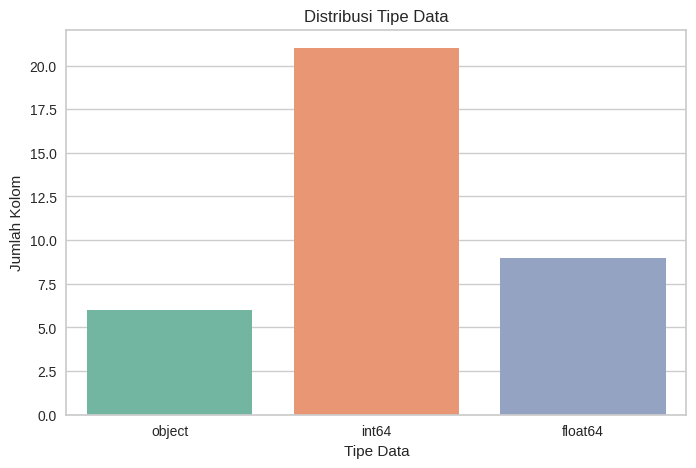

In [7]:
basic_data_info(df)

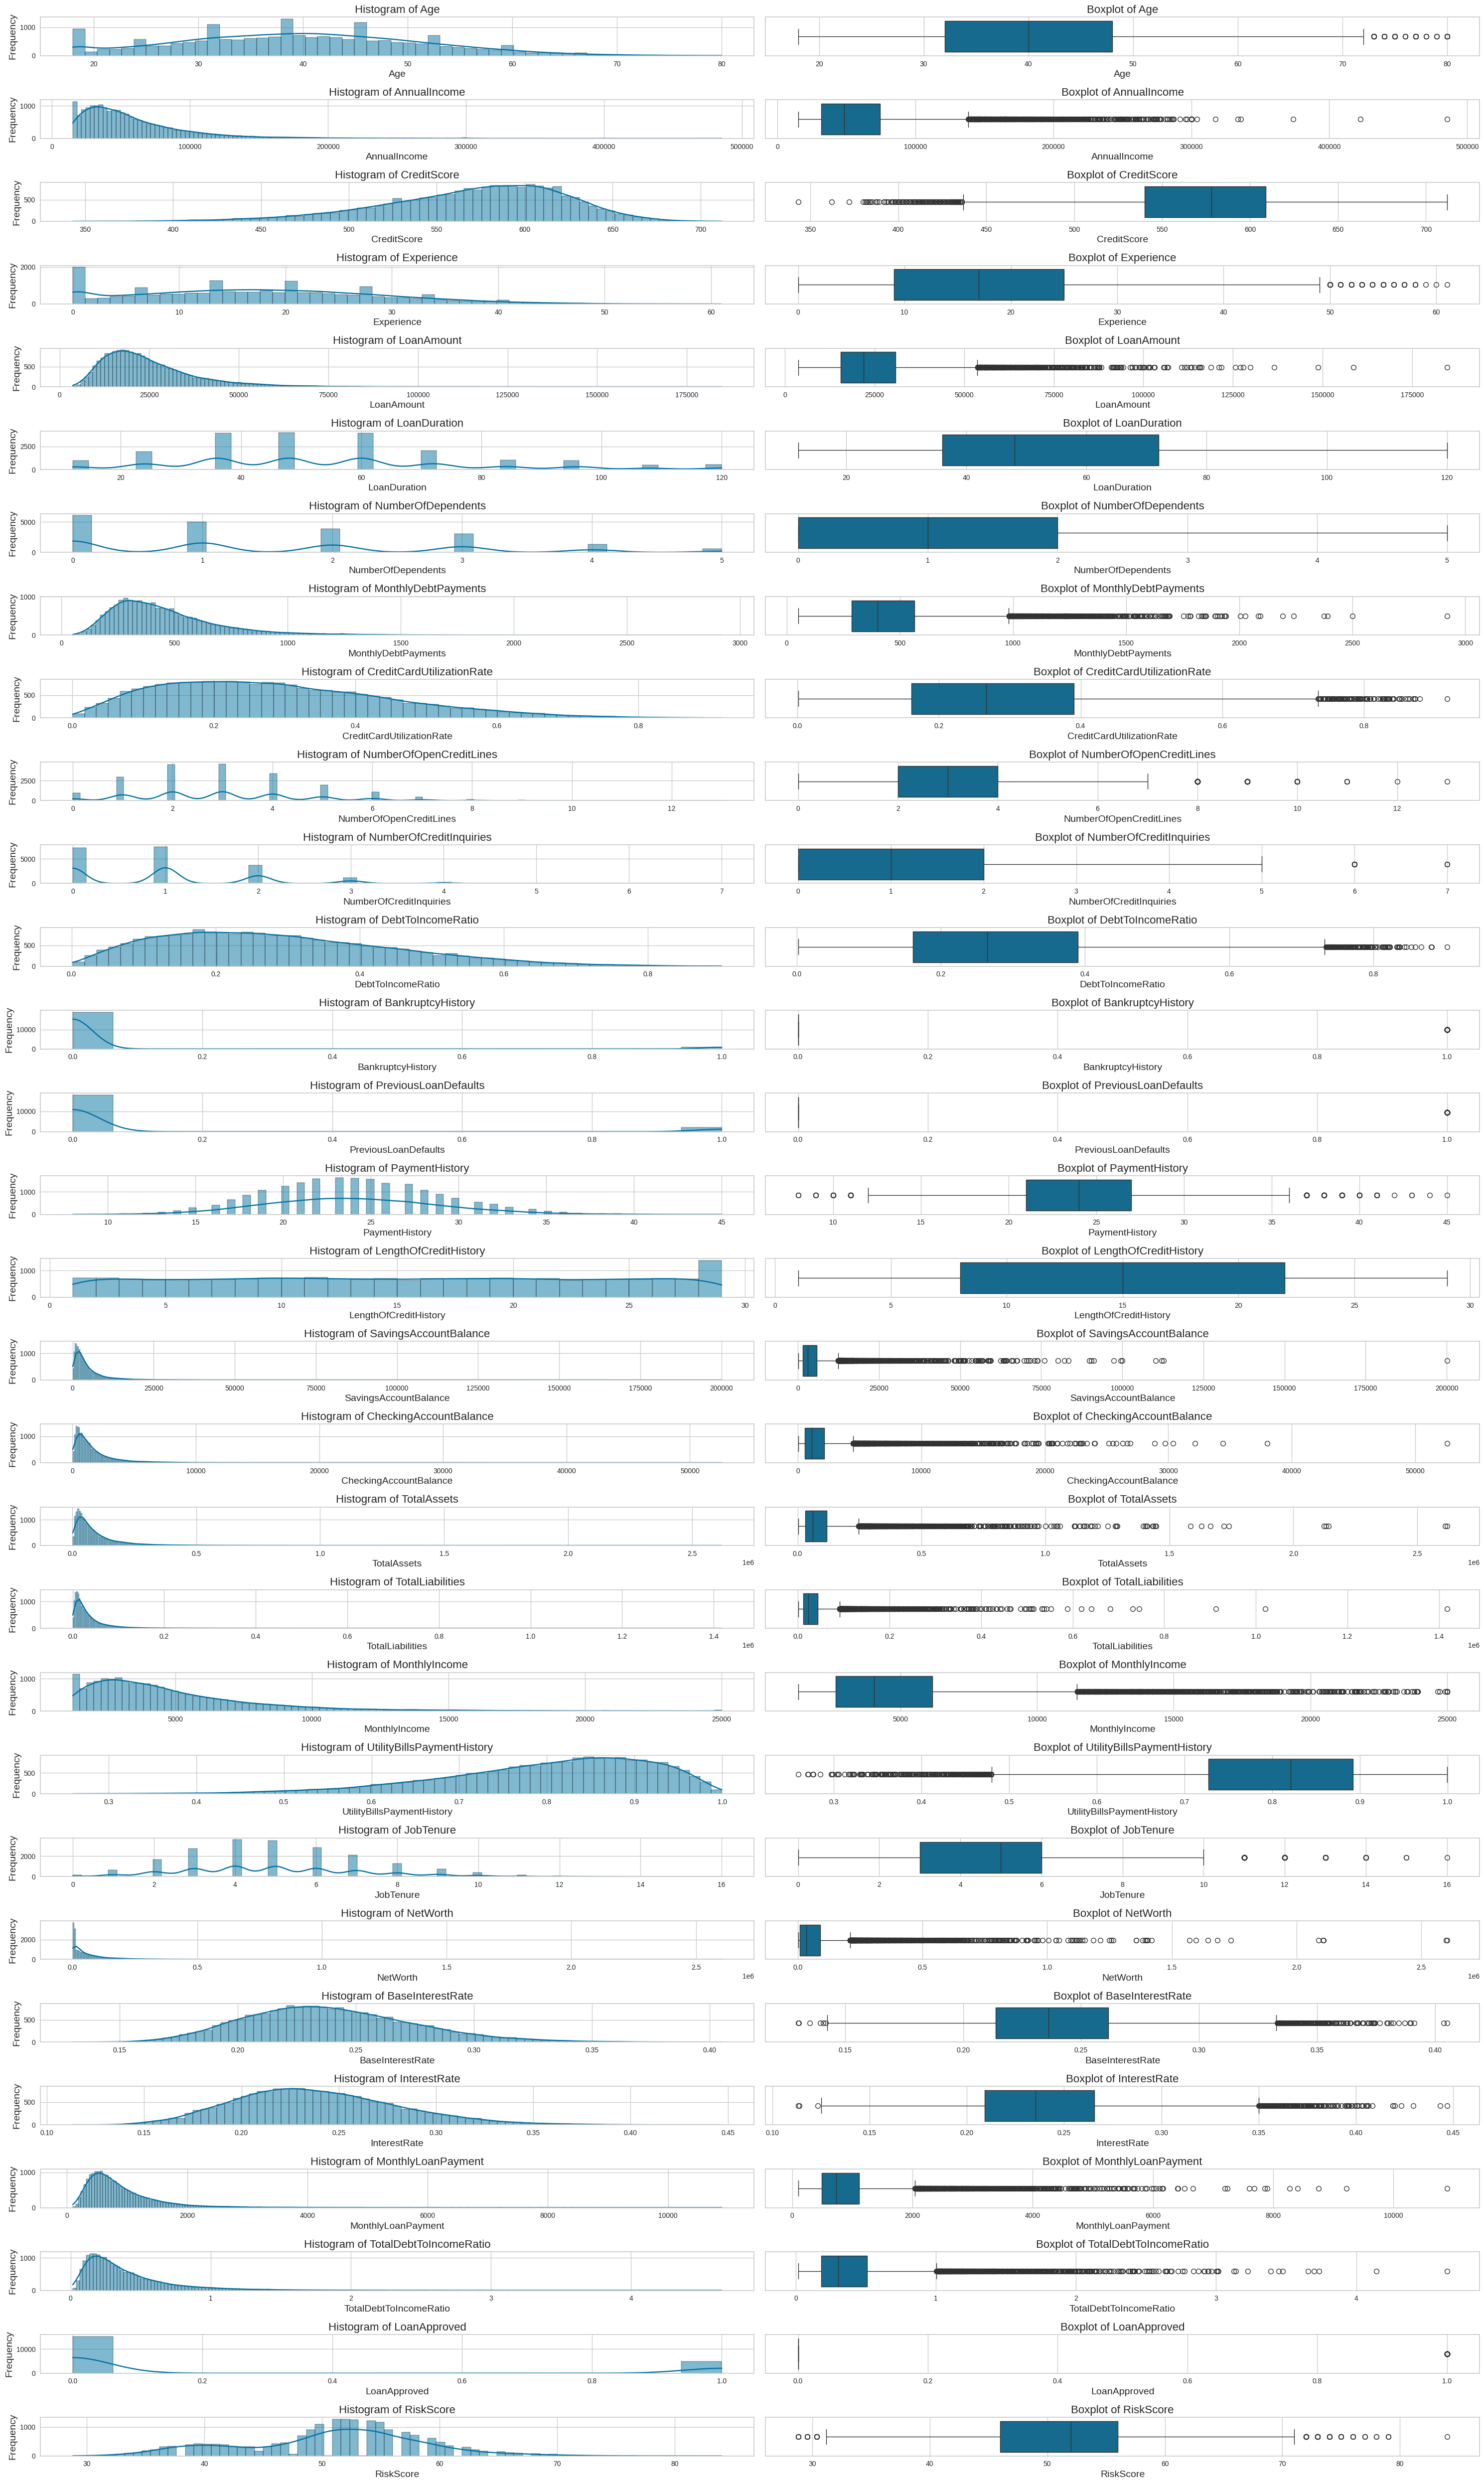

In [15]:
# Plot distribution of numerical variables
numerical_columns_temp = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(30, 50))
for i, col in enumerate(numerical_columns_temp, start=1):
    plt.subplot(len(numerical_columns_temp), 2, 2 * i - 1)
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogram of {col}", fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)

    plt.subplot(len(numerical_columns_temp), 2, 2 * i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}", fontsize=16)
    plt.xlabel(col, fontsize=14)

plt.tight_layout()
plt.show()

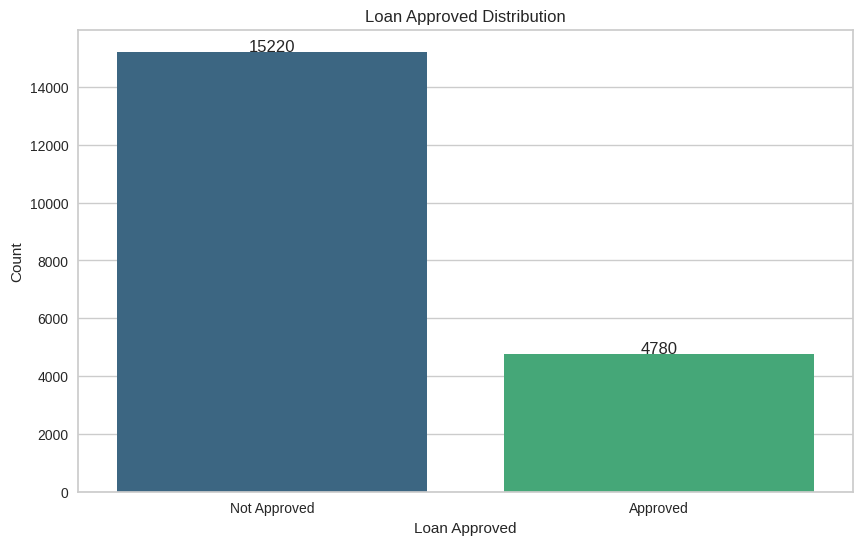

In [11]:
# Plot bar chart for the target variable 'LoanApproved'
plt.figure(figsize=(10, 6))
loan_approved_counts = df['LoanApproved'].value_counts()
sns.barplot(x=loan_approved_counts.index, y=loan_approved_counts.values, palette='viridis')
plt.xlabel("Loan Approved")
plt.ylabel("Count")
plt.title("Loan Approved Distribution")
plt.xticks(ticks=[0, 1], labels=['Not Approved', 'Approved'])
for i, v in enumerate(loan_approved_counts.values):
    plt.text(i, v + 0.5, str(v), ha='center', fontsize=12)
plt.show()

# **4. Data Processing**

Tahap pada `data processing` mencakup proses pengolahan data untuk dataset `df`. Berikut adalah ringkasan dari setiap bagian:

1. **Shape Dataset**
   - `df.shape`: Menampilkan dimensi (jumlah baris dan kolom) dari DataFrame.

2. **Data Duplicated**
   - `check_duplicates(df)`: Memeriksa dan menampilkan data duplikat dalam dataset.

3. **Missing Values**
   - `missing_data(df)`: Memeriksa dan menampilkan nilai yang hilang dalam dataset.

4. **Handling Outliers**
   - Memisahkan kolom menjadi numerik dan kategorikal, dan menghitung nilai unik serta persentase keunikannya untuk setiap kolom numerik.
   - Menampilkan boxplot untuk setiap kolom numerik untuk visualisasi outlier.
   - **Fungsi `detect_and_drop_outliers_iqr(numerical_columns, df)`**:
     - Menggunakan metode Interquartile Range (IQR) untuk mendeteksi dan menghapus outlier dari kolom numerik.
     - Mengembalikan DataFrame yang telah dibersihkan dan informasi mengenai outlier yang terdeteksi.

5. **Hasil Akhir**
   - Menampilkan jumlah dan persentase outlier di setiap kolom numerik.
   - Menampilkan jumlah total outlier yang terdeteksi dan sisa data setelah penghapusan outlier.
   - Menghapus kolom `PreviousLoanDefaults` dan `BankruptcyHistory` dari DataFrame `cleaned_df` karena hanya memiliki satu nilai unik setelah penghapusan outlier.

Proses ini bertujuan untuk membersihkan dan menyiapkan data agar siap untuk analisis lebih lanjut atau pemodelan.

In [ ]:
df.shape

(20000, 36)

## ***4.1 Duplicated Data***

In [ ]:
check_duplicates(df)

Nilai Duplikat (10 Teratas):
Jumlah Duplikat data: 0
Tidak ada duplikat yang ditemukan.
------------------------------


## ***4.2 Missing Value (NaN)***

In [ ]:
missing_data(df)


Total Kolom dengan Missing Values: 0
------------------------------


,Total,Percent
ApplicationDate,0,0.0
Age,0,0.0
PaymentHistory,0,0.0
LengthOfCreditHistory,0,0.0
SavingsAccountBalance,0,0.0
CheckingAccountBalance,0,0.0
TotalAssets,0,0.0
TotalLiabilities,0,0.0
MonthlyIncome,0,0.0
UtilityBillsPaymentHistory,0,0.0


## ***4.3 Handling Outlier***

In [ ]:
# Memisahkan kolom numerik dan kategorikal
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_columns.remove("LoanApproved") # Hapus LoanApproved karena ini adalah feature target-nya (label)
categorical_columns = df.select_dtypes(exclude=[np.number]).columns.tolist()

print("Kolom Numerik:", numerical_columns)
print("Kolom Kategorikal:", categorical_columns)

Kolom Numerik: ['Age', 'AnnualIncome', 'CreditScore', 'Experience', 'LoanAmount', 'LoanDuration', 'NumberOfDependents', 'MonthlyDebtPayments', 'CreditCardUtilizationRate', 'NumberOfOpenCreditLines', 'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory', 'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory', 'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities', 'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth', 'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment', 'TotalDebtToIncomeRatio', 'RiskScore']
Kolom Kategorikal: ['ApplicationDate', 'EmploymentStatus', 'EducationLevel', 'MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose']


In [ ]:
# Menghitung nilai unik (uniqueness) untuk setiap kolom numerik
unique_values = df[numerical_columns].nunique()

# Menghitung persentase uniqueness untuk setiap kolom
total_rows = len(df)
unique_percentage = (unique_values / total_rows) * 100

# Menyusun hasil dalam satu DataFrame
uniqueness_df = pd.DataFrame({
    'Unique Values': unique_values,
    'Percentage (%)': unique_percentage.round(2)  # Membulatkan hingga 2 desimal
})

# Menampilkan hasil
print("Nilai dan Persentase Unik dari Setiap Kolom Numerik:")
display(uniqueness_df)

Nilai dan Persentase Unik dari Setiap Kolom Numerik:


,Unique Values,Percentage (%)
Age,63,0.32
AnnualIncome,17516,87.58
CreditScore,322,1.61
Experience,62,0.31
LoanAmount,15578,77.89
LoanDuration,10,0.05
NumberOfDependents,6,0.03
MonthlyDebtPayments,1299,6.49
CreditCardUtilizationRate,20000,100.00
NumberOfOpenCreditLines,14,0.07


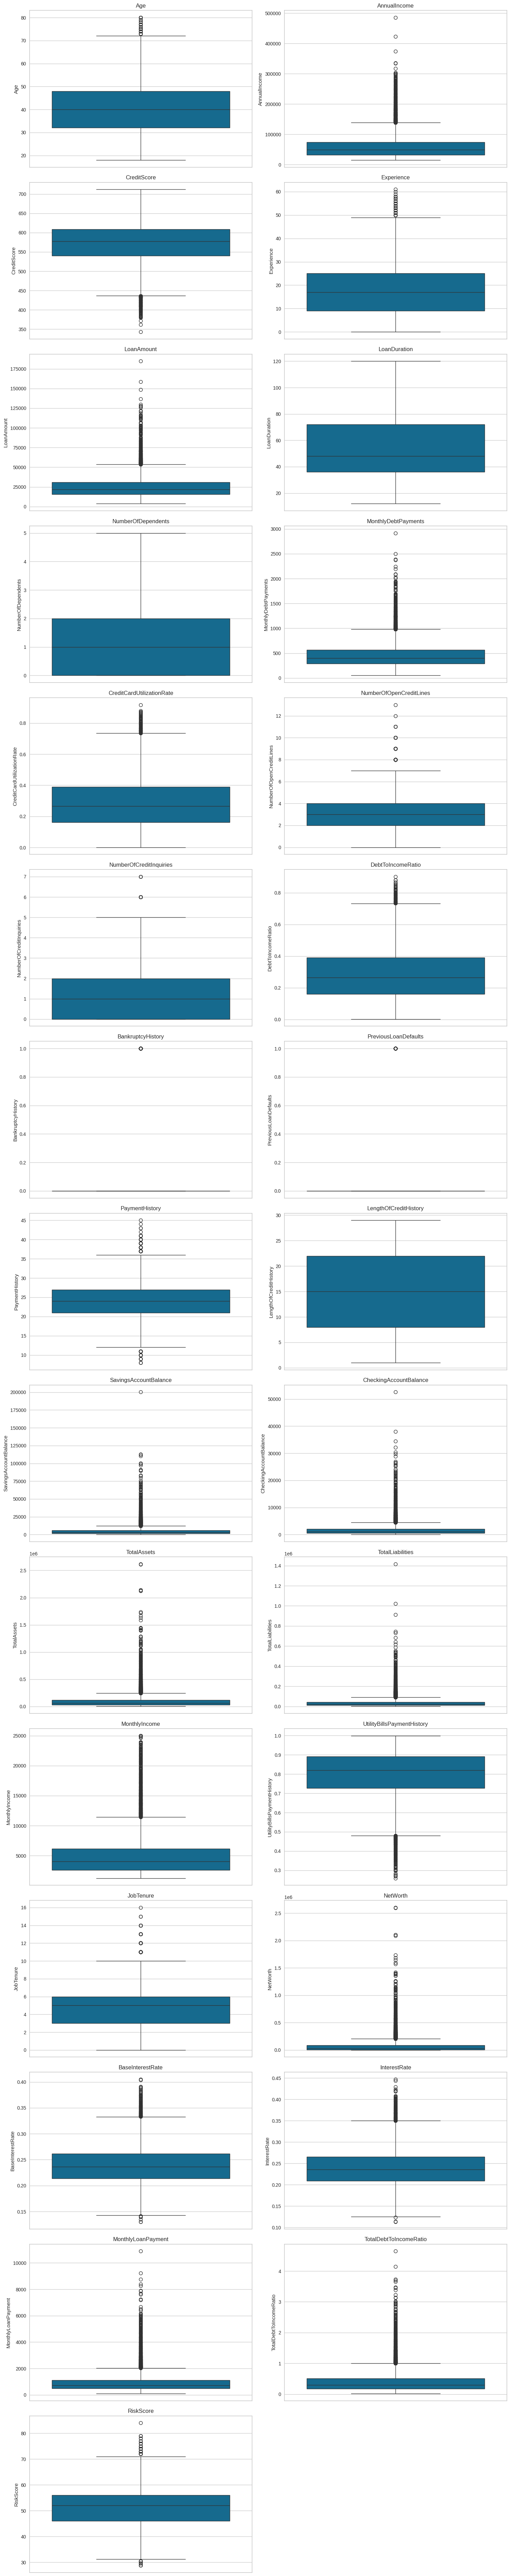

In [ ]:
# Mengatur ukuran grid plot
n_cols = 2
n_rows = len(numerical_columns) // n_cols + 1

plt.figure(figsize=(15, 5 * n_rows))

# Membuat boxplot untuk setiap kolom numerik
for i, col_name in enumerate(numerical_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=df[col_name])
    plt.title(col_name)

plt.tight_layout() # Menyesuaikan tata letak untuk spasi yang lebih baik
plt.show() # Menampilkan plot


# # Buat Boxplot untuk Kolom Numerik
# plt.figure(figsize=(15, 8))
# df[numerical_columns].boxplot()
# plt.xticks(rotation=90)  # Memutar label sumbu x agar lebih mudah dibaca
# plt.title("Boxplot untuk Kolom Numerik")
# plt.show()

In [ ]:
def detect_and_drop_outliers_iqr(numerical_columns, df):
    outlier_info = {}  # Untuk menyimpan informasi outlier dari setiap kolom

    # Loop untuk setiap kolom numerik
    for column in numerical_columns:
        # Menghitung Q1 (kuartil pertama) dan Q3 (kuartil ketiga)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1  # Menghitung Interquartile Range (IQR)

        # Menentukan batas bawah dan batas atas
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Mengidentifikasi outliers (nilai yang berada di luar batas bawah dan atas)
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

        # Menyimpan jumlah outliers untuk kolom tersebut
        outlier_count = len(outliers)
        total_count = len(df[column])  # Total jumlah data dalam kolom
        outlier_info[column] = {
            'Outlier Count': outlier_count,
            'Percentage (%)': (outlier_count / total_count) * 100  # Menghitung persentase outliers
        }

    # Mengonversi informasi outliers menjadi DataFrame untuk ditampilkan
    outlier_df = pd.DataFrame.from_dict(outlier_info, orient='index').reset_index()
    outlier_df.columns = ['Column', 'Outlier Count', 'Percentage (%)']
    outlier_df = outlier_df.sort_values(by='Outlier Count', ascending=False)

    # Menghapus outliers dari DataFrame
    cleaned_df = df.copy()  # Salin DataFrame untuk menghindari modifikasi asli
    for column in numerical_columns:
        # Menghitung ulang Q1, Q3, dan IQR untuk kolom tersebut
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Menghapus data yang berada di luar batas bawah dan atas
        cleaned_df = cleaned_df[(cleaned_df[column] >= (Q1 - 1.5 * IQR)) &
                                (cleaned_df[column] <= (Q3 + 1.5 * IQR))]

    return cleaned_df, outlier_df  # Mengembalikan DataFrame tanpa outliers dan informasi outlier

In [ ]:
cleaned_df, outlier_info_df = detect_and_drop_outliers_iqr(numerical_columns, df)

# Menampilkan informasi outlier untuk setiap kolom numerik
print("Jumlah dan Persentase Outliers di Setiap Kolom Numerik:")
display(outlier_info_df)

Jumlah dan Persentase Outliers di Setiap Kolom Numerik:


,Column,Outlier Count,Percentage (%)
13,PreviousLoanDefaults,2001,10.005
16,SavingsAccountBalance,1592,7.960
23,NetWorth,1564,7.820
19,TotalLiabilities,1533,7.665
17,CheckingAccountBalance,1522,7.610
18,TotalAssets,1442,7.210
27,TotalDebtToIncomeRatio,1152,5.760
26,MonthlyLoanPayment,1089,5.445
12,BankruptcyHistory,1048,5.240
1,AnnualIncome,947,4.735


In [ ]:
print("Jumlah Outlier yang terdeteksi:", outlier_info_df["Outlier Count"].sum())
print("Jumlah Sisa Data setelah terhapus karena handling outlier:", cleaned_df.shape)

Jumlah Outlier yang terdeteksi: 18545
Jumlah Sisa Data setelah terhapus karena handling outlier: (9184, 36)


In [ ]:
cleaned_df.drop(columns=["PreviousLoanDefaults", "BankruptcyHistory"], inplace = True) # Setelah drop outlier, ternyata hanya ada 1 value saja. jadi lebih baik saya drop

# **5. Exploratory Data Analysis - EDA**

Tahap ini berfokus pada **Analisis Data Eksploratori (Exploratory Data Analysis - EDA)** untuk menajawab rumusan masalah yaitu memahami faktor-faktor yang memengaruhi persetujuan pinjaman (`LoanApproved`). Berikut adalah ringkasan dari sub-bagian yang dilakukan:

1. **Korelasi antara Fitur dan Persetujuan Pinjaman**
   - Menghapus kolom yang tidak relevan seperti `ApplicationDate` dari dataset bersih (`cleaned_df`).
   - Mengonversi kolom kategorikal menjadi numerik menggunakan `LabelEncoder`.
   - Menghitung matriks korelasi untuk kolom numerik dalam DataFrame.
   - Mengurutkan korelasi terhadap kolom `LoanApproved` dan memvisualisasikannya menggunakan diagram batang horizontal untuk menunjukkan fitur-fitur yang memiliki pengaruh terhadap persetujuan pinjaman.

2. **Plot Regresi untuk Fitur yang Berkorelasi Kuat dengan Persetujuan Pinjaman**
   - Mengidentifikasi fitur-fitur penting seperti `MonthlyIncome`, `AnnualIncome`, `RiskScore`, `TotalDebtToIncomeRatio`, dan `InterestRate`.
   - Membuat plot regresi linear untuk masing-masing fitur terhadap `LoanApproved` untuk menggambarkan hubungan antara fitur-fitur ini dan kemungkinan persetujuan pinjaman.

Proses ini penting untuk mendapatkan wawasan awal dan mengarahkan langkah selanjutnya dalam pemodelan dan analisis lebih lanjut.

**[Rumusan Masalah]**

> 1. ***Bagaimana mengidentifikasi faktor-faktor utama yang mempengaruhi persetujuan pinjaman (LoanApproved) berdasarkan atribut-atribut personal dan finansial pemohon?***

## **5.1 Correlation between Features and Loan Approval**

In [ ]:
# Hapus kolom yang tidak relevan seperti ApplicationDate
df_numeric = cleaned_df.drop(columns=['ApplicationDate'])

# Konversi kolom kategorikal ke numerik menggunakan LabelEncoder
le = LabelEncoder()

for col in categorical_columns[1:]: # Tanpa memasukkan ApplicationDate
    df_numeric[col] = le.fit_transform(df_numeric[col])

correlation_matrix = df_numeric.corr() # Hitung korelasi hanya pada kolom numerik

correlation_matrix = correlation_matrix["LoanApproved"].sort_values(ascending=False) # Cetak korelasi dengan kolom LoanApproved

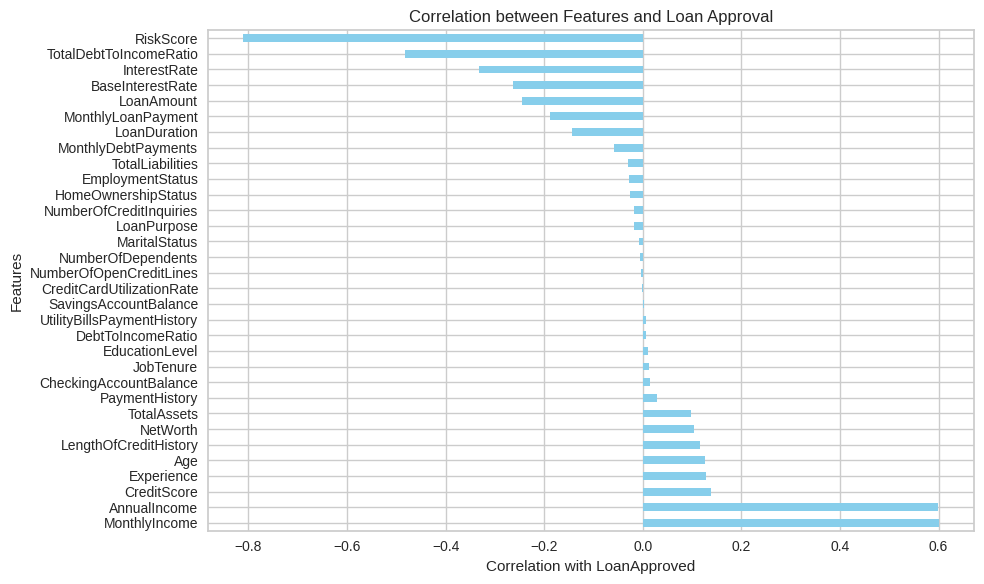

In [ ]:
# Plot bar chart horizontal
plt.figure(figsize=(10, 6))
correlation_matrix.drop('LoanApproved').plot(kind='barh', color='skyblue')  # Drop kolom LoanApproved sendiri dari plot

# Menambahkan label dan judul
plt.xlabel('Correlation with LoanApproved')
plt.ylabel('Features')
plt.title('Correlation between Features and Loan Approval')

# Tampilkan plot
plt.tight_layout()
plt.show()

## **5.2 Regression plot for features that are strongly correlated with Loan Approved**

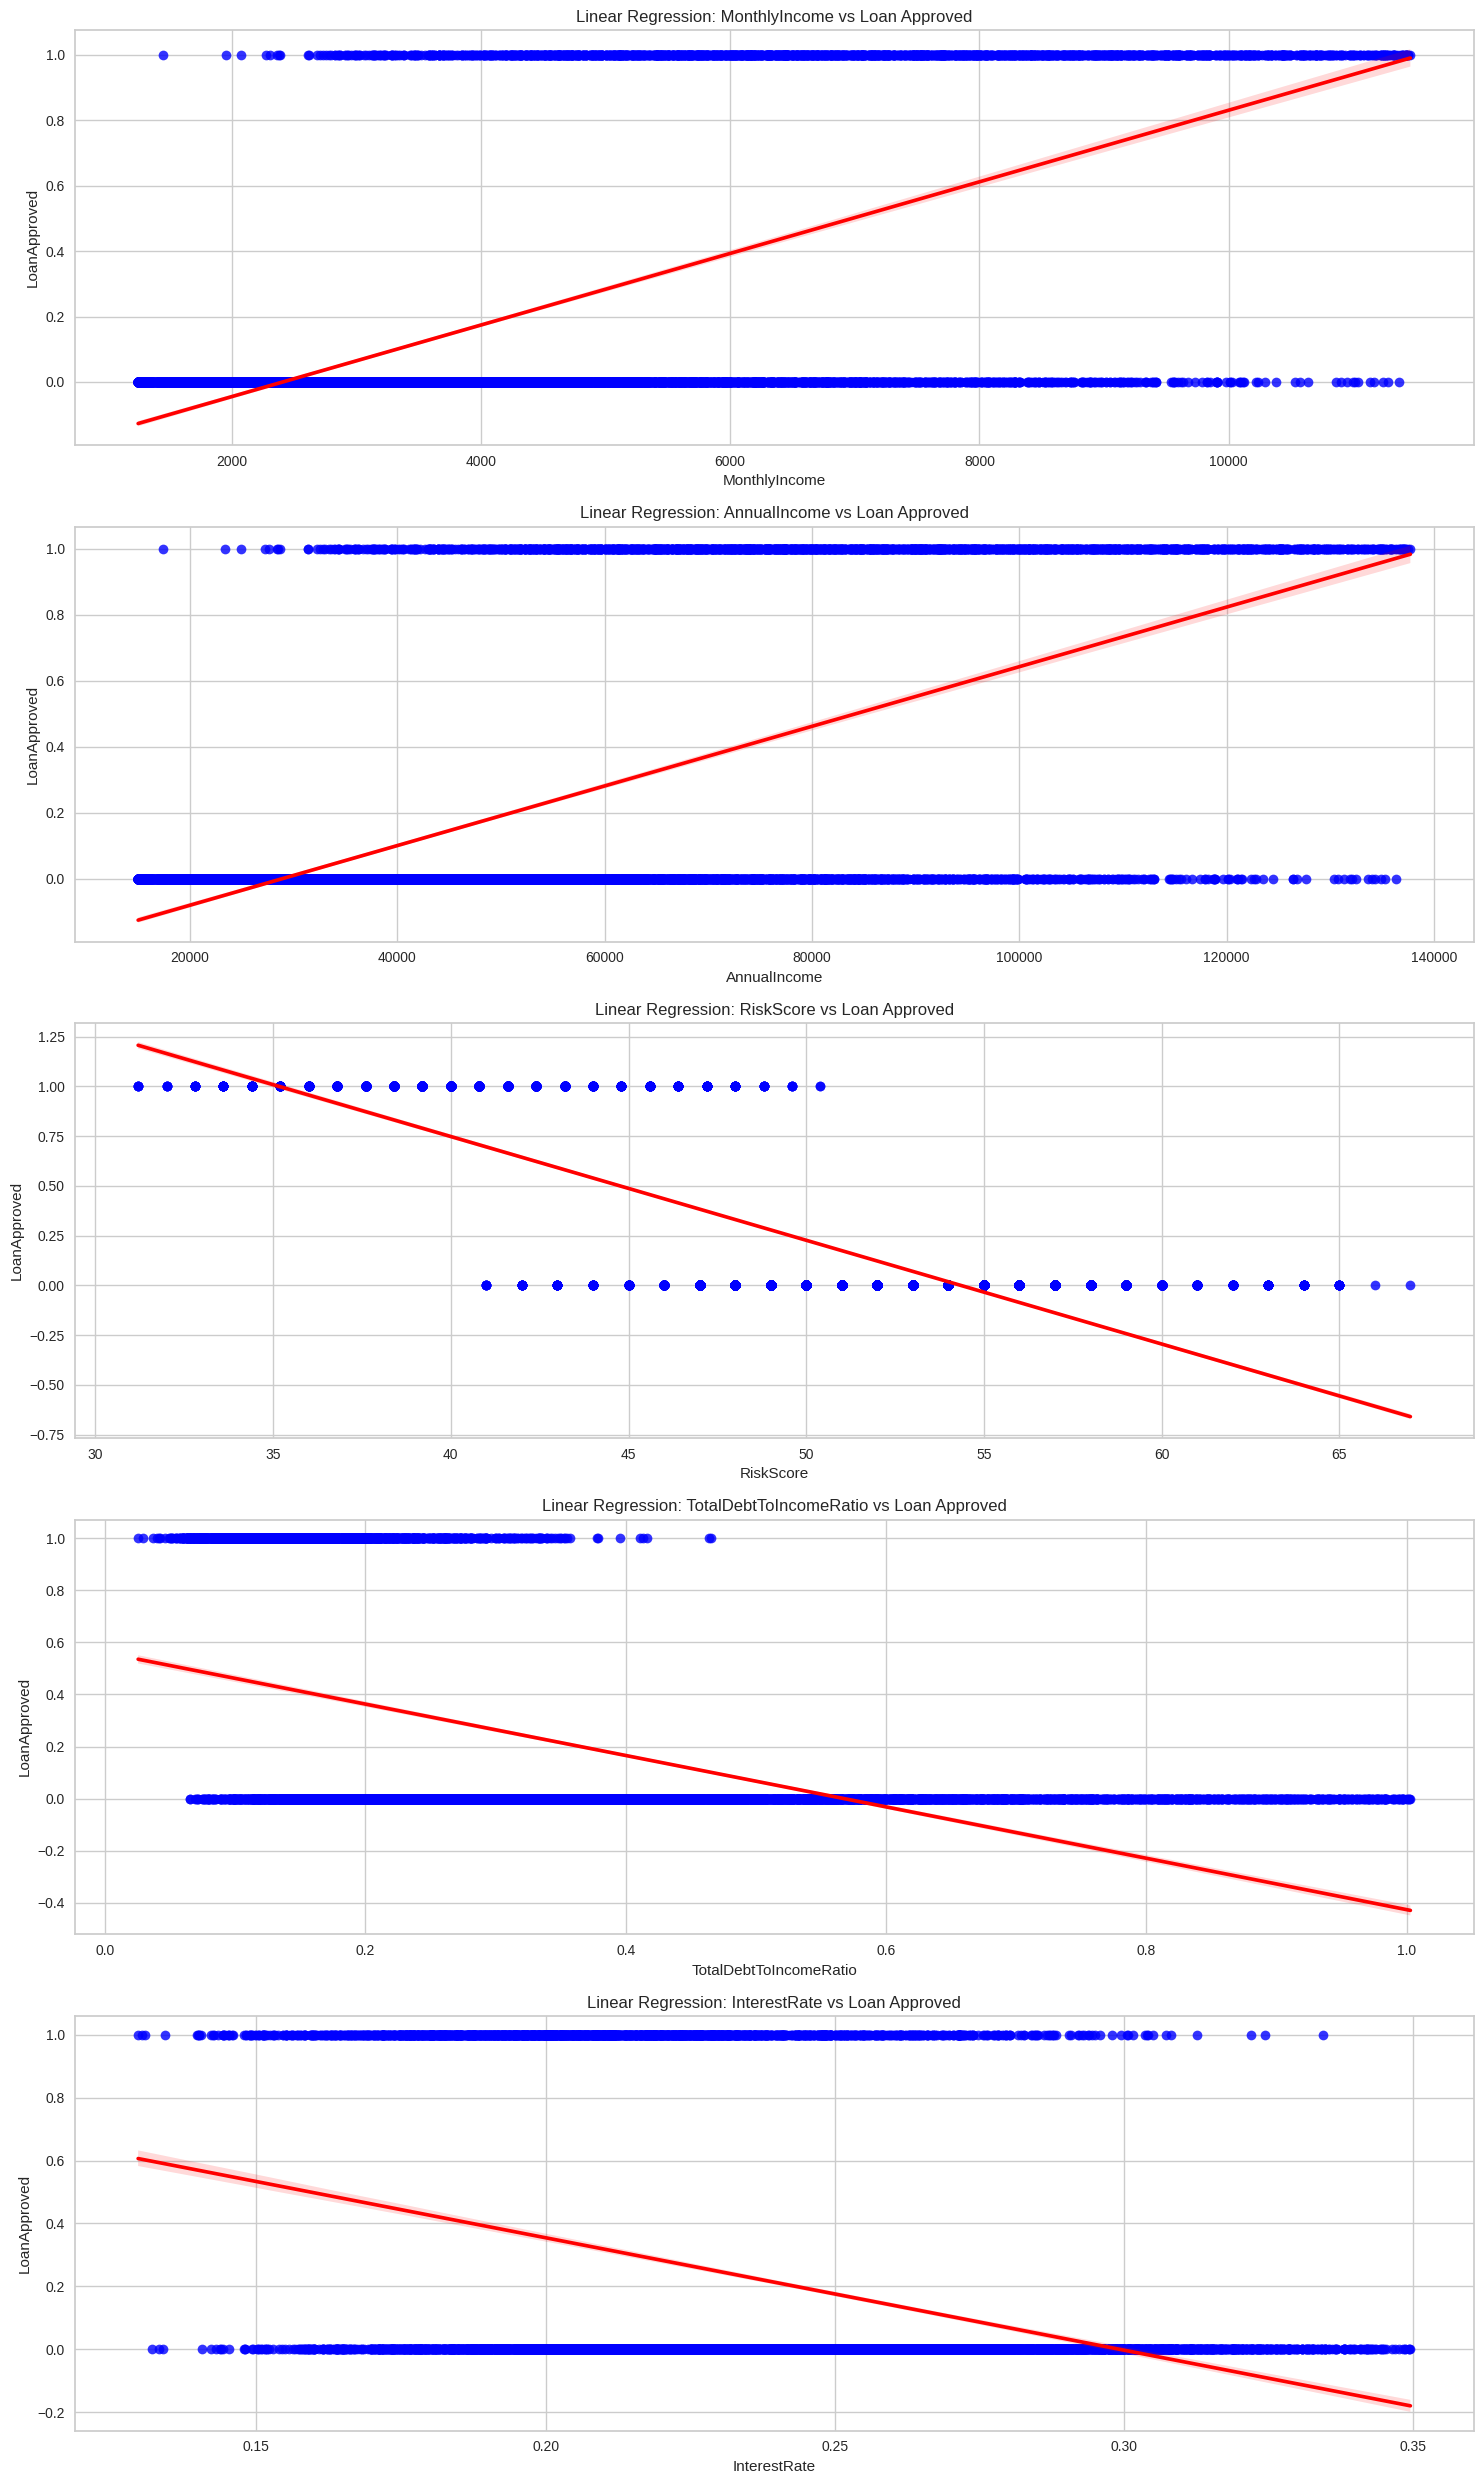

In [ ]:
# List fitur penting
features = ['MonthlyIncome', 'AnnualIncome', 'RiskScore', 'TotalDebtToIncomeRatio', 'InterestRate']

# Buat plot regresi untuk setiap fitur
plt.figure(figsize=(15, 25))

for i, feature in enumerate(features, 1):
    plt.subplot(len(features), 1, i)  # Atur subplot
    sns.regplot(x=feature, y='LoanApproved', data=df_numeric, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
    plt.title(f'Linear Regression: {feature} vs Loan Approved')

plt.tight_layout()
plt.show()

# **6. Data Preparation for Modeling**

Data preparation merupakan tahapan penting dalam proses pengembangan model machine learning. Ini adalah tahap di mana kita melakukan proses transformasi pada data sehingga menjadi bentuk yang cocok untuk proses pemodelan. Ada beberapa tahapan yang umum dilakukan pada data preparation, antara lain, seleksi fitur, transformasi data, feature engineering, dan dimensionality reduction.

Berikut adalah Tahap **Data Preparation** untuk pemodelan machine learning dari setiap sub-bagian:

1. **Encoding Fitur Kategori**
   - Melakukan **One-Hot Encoding** untuk fitur kategorikal menggunakan `pd.get_dummies()` untuk mengubah kategori menjadi variabel biner.

2. **Feature Scaling Menggunakan Min-Max Scaler**
   - Menggunakan **Min-Max Scaling** untuk menormalkan fitur ke rentang [0, 1], mencegah dominasi fitur dengan skala lebih besar, dan memperbaiki performa model berbasis jarak serta Neural Networks.

3. **Splitting Data**
   - Menghapus kolom `ApplicationDate`, memisahkan fitur (`X`) dan target (`y`), serta melakukan encoding pada label target.
   - Membagi dataset menjadi data latih dan data uji (80:20) dengan menjaga distribusi kelas yang seimbang.

**[Rumusan Masalah]**

> 2. ***Bagaimana algoritma prediktif dapat diimplementasikan untuk meningkatkan akurasi prediksi persetujuan pinjaman dan risiko kredit dengan memanfaatkan data historis dari pemohon?***

## **6.1 Encoding Fitur Kategori**

In [ ]:
# Lakukan One-Hot Encoding untuk fitur kategorikal
df_encoded = pd.get_dummies(cleaned_df, columns=categorical_columns[1:], drop_first=True)

print("Shape setelah One-Hot Encoding:", df_encoded.shape)

Shape setelah One-Hot Encoding: (9184, 45)


In [ ]:
df_encoded.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,DebtToIncomeRatio,PaymentHistory,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore,EmploymentStatus_Self-Employed,EmploymentStatus_Unemployed,EducationLevel_Bachelor,EducationLevel_Doctorate,EducationLevel_High School,EducationLevel_Master,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed,HomeOwnershipStatus_Other,HomeOwnershipStatus_Own,HomeOwnershipStatus_Rent,LoanPurpose_Debt Consolidation,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
1,2018-01-02,38,39709,628,15,26045,48,1,496,0.087827,5,3,0.330274,21,9,4627,3460,53204,9595,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False
3,2018-01-04,58,69084,545,34,37898,96,1,755,0.267587,2,1,0.436244,27,10,1675,1217,104822,5370,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False
6,2018-01-07,58,51250,564,39,12741,48,0,337,0.367380,6,1,0.127473,21,18,5161,1735,65624,43894,4270.833333,0.884275,5,21730,0.225741,0.205271,391.300352,0.170529,0,50.0,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,True
7,2018-01-08,49,97345,516,23,19634,12,5,288,0.209768,5,0,0.395568,19,11,781,74,50177,11556,8112.083333,0.933492,5,38621,0.226634,0.209113,1827.360055,0.260767,1,42.4,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
12,2018-01-13,42,74453,573,21,16154,60,1,258,0.527488,6,0,0.371034,26,7,781,1633,16204,35493,6204.416667,0.718949,5,5231,0.234654,0.255685,479.539890,0.118873,0,56.0,False,False,True,False,False,False,True,False,False,False,False,True,True,False,False,False


## **6.2 Feature Scaling Using Min-Max Scaler**

**Min-Max Scaling** adalah teknik normalisasi yang mengubah fitur ke dalam skala tertentu, biasanya **antara 0 dan 1**. Tujuannya adalah untuk memastikan bahwa semua fitur berada dalam rentang yang sama, sehingga tidak ada fitur yang mendominasi fitur lainnya berdasarkan skala. Ini sangat penting dalam model yang sensitif terhadap skala, seperti **K-Nearest Neighbors (KNN)**, **Support Vector Machines (SVM)**, dan **Neural Networks**.

**<h3> Rumus Min-Max Scaling: </h3>**

$
X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
$

- $X$ adalah nilai asli.
- $X_{\text{min}}$ dan $X_{\text{max}}$ adalah nilai minimum dan maksimum dari fitur tersebut.
- Hasilnya adalah nilai yang diubah ke dalam rentang [0, 1].

**<h3> Mengapa Menggunakan Min-Max Scaling? </h3>**

- **Menghindari dominasi fitur**: Jika suatu fitur memiliki skala yang jauh lebih besar, itu dapat mendominasi perhitungan jarak atau gradien, sehingga menurunkan performa model. dan cocok untuk data yang **memiliki distribusi tidak normal** atau tidak mengikuti distribusi Gaussian.
- **Model berbasis jarak**: Model seperti **KNN** atau **SVM** memerlukan fitur dengan skala yang sama agar perhitungan jarak antar data akurat.
- **Neural Networks**: Algoritma ini bekerja lebih baik dengan input yang terdistribusi dalam rentang yang sama, karena mempercepat proses pembelajaran.

Hasilnya adalah semua kolom numerik memiliki nilai antara **0 dan 1**, sehingga siap untuk digunakan dalam model machine learning yang peka terhadap skala fitur.

In [ ]:
# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
# Dapatkan daftar kolom
features_to_scale = [col for col in df_encoded.columns if col not in ["LoanApproved", "ApplicationDate"]]

# Menampilkan daftar kolom yang telah diubah
print(features_to_scale)

['Age', 'AnnualIncome', 'CreditScore', 'Experience', 'LoanAmount', 'LoanDuration', 'NumberOfDependents', 'MonthlyDebtPayments', 'CreditCardUtilizationRate', 'NumberOfOpenCreditLines', 'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'PaymentHistory', 'LengthOfCreditHistory', 'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities', 'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth', 'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment', 'TotalDebtToIncomeRatio', 'RiskScore', 'EmploymentStatus_Self-Employed', 'EmploymentStatus_Unemployed', 'EducationLevel_Bachelor', 'EducationLevel_Doctorate', 'EducationLevel_High School', 'EducationLevel_Master', 'MaritalStatus_Married', 'MaritalStatus_Single', 'MaritalStatus_Widowed', 'HomeOwnershipStatus_Other', 'HomeOwnershipStatus_Own', 'HomeOwnershipStatus_Rent', 'LoanPurpose_Debt Consolidation', 'LoanPurpose_Education', 'LoanPurpose_Home', 'LoanPurpose_Other']


In [ ]:
# Fit and transform the data
df_scaled = df_encoded.copy()
df_scaled[features_to_scale] = scaler.fit_transform(df_scaled[features_to_scale])

In [ ]:
df_scaled.sample(5)

,ApplicationDate,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,DebtToIncomeRatio,PaymentHistory,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore,EmploymentStatus_Self-Employed,EmploymentStatus_Unemployed,EducationLevel_Bachelor,EducationLevel_Doctorate,EducationLevel_High School,EducationLevel_Master,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed,HomeOwnershipStatus_Other,HomeOwnershipStatus_Own,HomeOwnershipStatus_Rent,LoanPurpose_Debt Consolidation,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
1666,2022-07-25,0.185185,0.098014,0.498113,0.081633,0.225951,0.333333,0.2,0.176982,0.270419,0.571429,0.2,0.060533,0.541667,0.321429,0.033363,0.171935,0.495873,0.134978,0.098216,0.542296,0.7,0.527744,0.425337,0.401576,0.192065,0.288877,0,0.441341,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7128,2037-07-08,0.444444,0.466644,0.675472,0.387755,0.253792,0.555556,0.6,0.435396,0.233807,0.142857,0.2,0.017498,0.375000,0.357143,0.252665,0.108272,0.033972,0.101523,0.467608,0.838103,0.6,0.000939,0.414010,0.343282,0.154371,0.119787,1,0.156425,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14766,2058-06-06,0.444444,0.152072,0.615094,0.367347,0.596906,0.666667,0.4,0.558089,0.498376,0.428571,0.4,0.566154,0.416667,0.214286,0.262837,0.157364,0.091310,0.056942,0.152386,0.552622,0.4,0.087606,0.603070,0.372717,0.345452,0.463487,0,0.664804,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
14458,2057-08-02,0.500000,0.670306,0.415094,0.551020,0.978094,0.444444,0.0,0.473398,0.431026,0.428571,0.2,0.249765,0.458333,0.035714,0.119212,0.127998,0.340294,0.205747,0.671690,0.492955,0.3,0.314493,0.740546,0.562045,0.749872,0.232769,0,0.553073,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
16768,2063-11-29,0.259259,0.750509,0.652830,0.163265,0.294306,0.555556,0.8,0.224756,0.638844,0.428571,0.0,0.636321,0.541667,0.892857,0.518268,0.177539,0.274374,0.173251,0.752059,0.901527,0.4,0.251410,0.441035,0.474862,0.195924,0.059410,1,0.335196,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## **6.3 Splitting Data**

In [ ]:
df_scaled = df_scaled.drop(columns=["ApplicationDate"])

In [ ]:
X = df_scaled.drop(columns=['LoanApproved'])
y = df_scaled['LoanApproved']

# Encode label strings into numbers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
# Membagi dataset menjadi training dan testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Membagi dataset menjadi training dan testing sets
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("y_train_encoded shape:", y_train_encoded.shape)
print("y_test_encoded shape:", y_test_encoded.shape)

X_train shape: (7347, 43)
X_test shape: (1837, 43)
y_train shape: (7347,)
y_test shape: (1837,)
y_train_encoded shape: (7347,)
y_test_encoded shape: (1837,)


In [ ]:
Counter(y_train_encoded), Counter(y_test_encoded)

(Counter({0: 5679, 1: 1668}), Counter({1: 417, 0: 1420}))

# **7. Membangun Model Classification**

Berikut adalah penjelasan dari tahap **membangun model klasifikasi**:

1. **Kelas untuk Implementasi Train dan Evaluasi Model**
   - **`ModelEvaluation`**: Kelas ini memiliki metode untuk melatih dan mengevaluasi model, termasuk menghitung metrik seperti akurasi, presisi, recall, dan F1 Score.

2. **Inisialisasi Model**
   - Daftar model yang digunakan untuk klasifikasi meliputi:
     - AdaBoostClassifier
     - RidgeClassifier
     - LinearDiscriminantAnalysis
     - SVM dengan kernel linear
     - LogisticRegression
     - QuadraticDiscriminantAnalysis

3. **Pelatihan dan Evaluasi Model**
   - Setiap model dilatih dan dievaluasi, hasilnya disimpan dalam daftar.
   - Hasil yang ditampilkan mencakup metrik evaluasi dan waktu pelatihan.

4. **Visualisasi Hasil Evaluasi**
   - **Bar Chart**: Menampilkan perbandingan metrik evaluasi (Akurasi, Presisi, Recall, F1 Score) untuk semua model.
   - **Confusion Matrix**: Heatmap untuk setiap model menunjukkan kinerja prediksi.
   - **Bar Chart untuk Waktu Pelatihan**: Membandingkan waktu yang diperlukan untuk melatih masing-masing model.

Dengan demikian, tahap ini memungkinkan pemilihan model terbaik berdasarkan metrik yang relevan.

## **7.1 Build Class untuk Implementasi Train and Eval Model**

In [ ]:
class ModelEvaluation:
    def __init__(self, model, model_name):
        self.model = model
        self.model_name = model_name
        self.results = {}

    # Method untuk melatih model
    def train_model(self, X_train, y_train):
        # Record training time
        start_time = time.time()
        self.model.fit(X_train, y_train)
        end_time = time.time()
        train_time = end_time - start_time

        # Store training time in results
        self.results['Model'] = self.model_name
        self.results['Training Time (Sec)'] = train_time

    # Method untuk evaluasi model
    def evaluate_model(self, X_test, y_test):
        # Make predictions
        y_pred = self.model.predict(X_test)

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        report = classification_report(y_test, y_pred)

        # Store results
        self.results["Accuracy"] = accuracy
        self.results["Precision"] = precision
        self.results["Recall"] = recall
        self.results["F1 Score"] = f1
        self.results["Confusion Matrix"] = cm
        self.results["Classification Report"] = report

        return self.results

## **7.2 Model Object Initiation**

In [ ]:
# List dari model dan string untuk namanya
models = [
    (AdaBoostClassifier(), "Ada Boost Classifier"),
    (RidgeClassifier(), "Ridge Classifier"),
    (LinearDiscriminantAnalysis(), "Linear Discriminant Analysis"),
    (SVC(kernel='linear'), "SVM - Linear Kernel"),
    (LogisticRegression(), "Logistic Regression"),
    (QuadraticDiscriminantAnalysis(), "Quadratic Discriminant Analysis")
]

## **7.3 Train and Evaluation Model**

In [ ]:
# List untuk menyimpan hasil evaluasi
evaluation_results = []

# Loop through each model and evaluate it
for model, model_name in models:
    evaluator = ModelEvaluation(model, model_name)
    evaluator.train_model(X_train, y_train)
    result = evaluator.evaluate_model(X_test, y_test)
    evaluation_results.append(result)

In [ ]:
# Display results for each model
for result in evaluation_results:
    print(f"------- Model: {result['Model']} -------")
    print(f"Accuracy: {result['Accuracy']}")
    print(f"Precision: {result['Precision']}")
    print(f"Recall: {result['Recall']}")
    print(f"F1 Score: {result['F1 Score']}")
    print(f"Confusion Matrix:\n{result['Confusion Matrix']}")
    # print(f"Classification Report:\n{result['Classification Report']}")
    print(f"Training Time (Sec): {result['Training Time (Sec)']}\n")
    print("="*70, "\n")

------- Model: Ada Boost Classifier -------
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[1420    0]
 [   0  417]]
Training Time (Sec): 1.444993257522583


------- Model: Ridge Classifier -------
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[1420    0]
 [   0  417]]
Training Time (Sec): 0.010228872299194336


------- Model: Linear Discriminant Analysis -------
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[1420    0]
 [   0  417]]
Training Time (Sec): 0.04940438270568848


------- Model: SVM - Linear Kernel -------
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[1420    0]
 [   0  417]]
Training Time (Sec): 0.16782522201538086


------- Model: Logistic Regression -------
Accuracy: 0.9994556341861731
Precision: 1.0
Recall: 0.9976019184652278
F1 Score: 0.9987995198079231
Confusion Matrix:
[[1420    0]
 [   1  416]]
Training Time (Sec): 0.05615639686584473


------- Model: Quad

## **7.4 Model Selection Based On Evaluation Metric**

In [ ]:
# Convert evaluation results to a DataFrame for easier plotting
df_results = pd.DataFrame(evaluation_results)

# Reshape the DataFrame to a long format for Plotly Express
df_melted = df_results.melt(id_vars='Model', value_vars=['Accuracy', 'Precision', 'Recall', 'F1 Score'],
                            var_name='Metric', value_name='Score')

# Create the grouped bar chart using Plotly Express
fig = px.bar(df_melted,
             x='Model',
             y='Score',
             color='Metric',
             barmode='group',
             title='Model Evaluation Metrics Comparison')

# Customize the layout to place legend below the plot
fig.update_layout(
    legend=dict(
        orientation="h",  # Horizontal legend
        yanchor="bottom",
        y=-0.3,  # Position the legend below the plot
        xanchor="center",
        x=0.5
    ),
    xaxis_title='Models',
    yaxis_title='Scores',
    title_x=0.5  # Center the title
)

# Show the plot
fig.show()

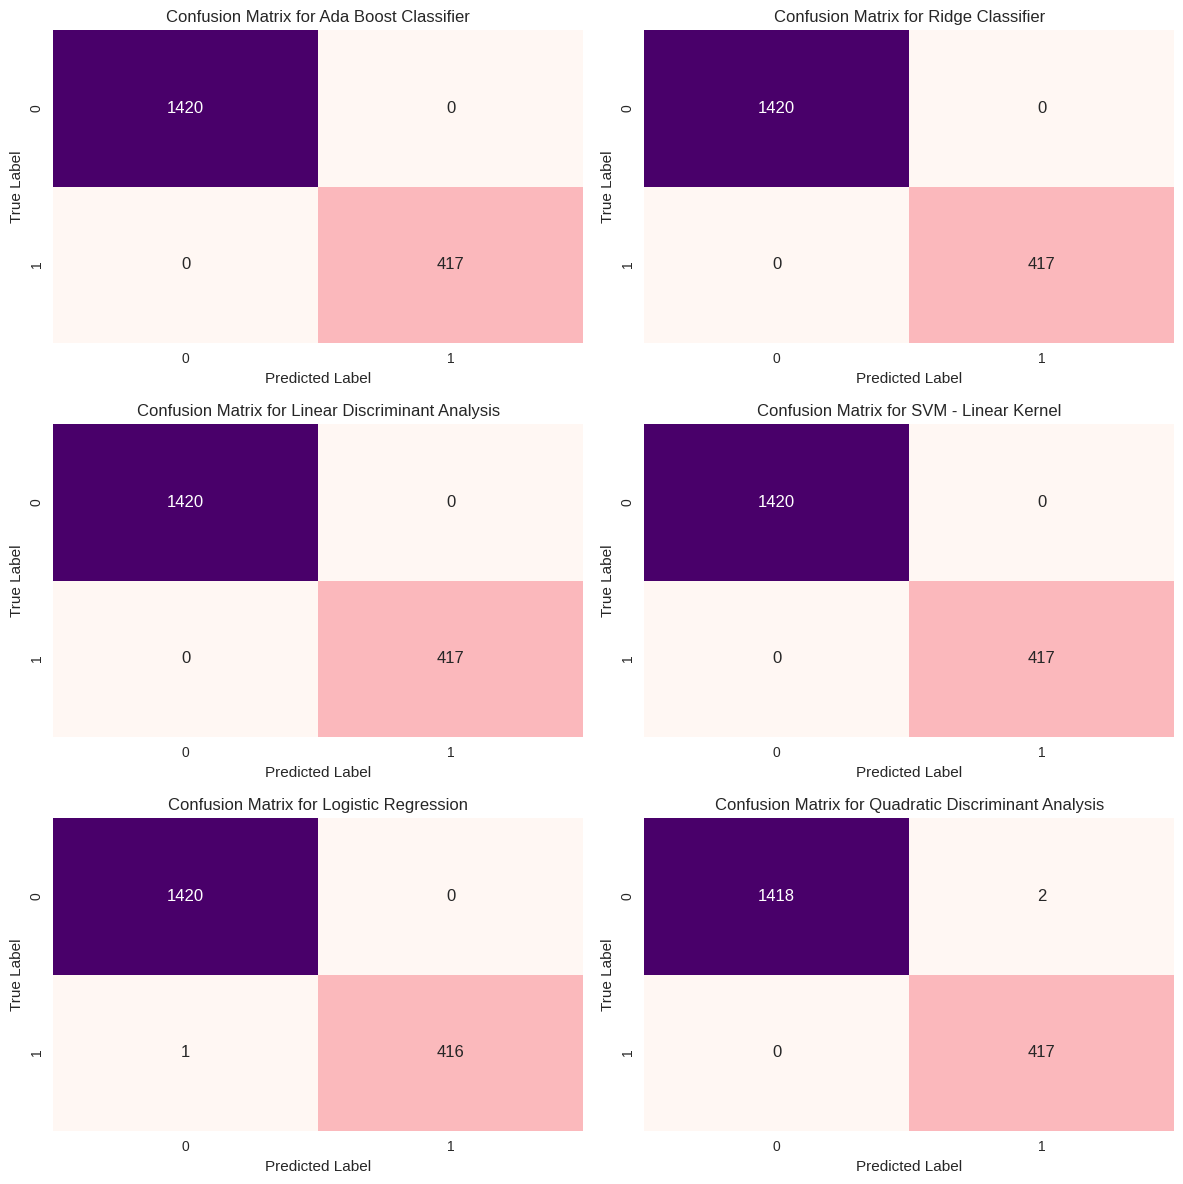

In [ ]:
num_models = len(evaluation_results) # Number of models

# Calculate the number of rows needed (2 columns per row)
num_cols = 2
num_rows = math.ceil(num_models / num_cols)

# Create subplots with 2 columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, num_rows * 4))

# Flatten axes for easier indexing
axes = axes.flatten()

# Loop through each model and plot confusion matrix
for idx, result in enumerate(evaluation_results):
    model_name = result['Model']
    conf_matrix = result['Confusion Matrix']

    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="RdPu", cbar=False, ax=axes[idx])
    axes[idx].set_title(f'Confusion Matrix for {model_name}')
    axes[idx].set_xlabel('Predicted Label')
    axes[idx].set_ylabel('True Label')

# Remove empty subplots if any
for i in range(idx + 1, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# Create a bar chart for Training Time
fig = px.bar(df_results,
             x='Model',
             y='Training Time (Sec)',
             title='Model Training Time Comparison',
             labels={'Training Time (Sec)': 'Training Time (Seconds)', 'Model': 'Models'})

# Customize the layout
fig.update_layout(
    xaxis_title='Models',
    yaxis_title='Training Time (Seconds)',
    title_x=0.5  # Center the title
)

# Show the plot
fig.show()

# **8. Kesimpulan**

## ***1. Bagaimana mengidentifikasi faktor-faktor utama yang mempengaruhi persetujuan pinjaman (LoanApproved) berdasarkan atribut-atribut personal dan finansial pemohon?***

Berdasarkan grafik di 5.1 dan 5.2, hasil interpretasi untuk mengidentifikasi faktor-faktor utama yang mempengaruhi persetujuan pinjaman (LoanApproved):

1. **Faktor yang Berhubungan Positif dengan Persetujuan Pinjaman**:
   - Berdasarkan plot regresi linear dan grafik korelasi, fitur **MonthlyIncome**, **AnnualIncome**, dan **CreditScore** memiliki korelasi positif dengan persetujuan pinjaman. Hal ini menunjukkan bahwa pemohon dengan pendapatan bulanan dan tahunan yang lebih tinggi serta skor kredit yang lebih baik memiliki peluang lebih besar untuk mendapatkan persetujuan pinjaman.
   - Faktor lain seperti **Experience** dan **Age** juga menunjukkan korelasi positif meskipun relatif kecil.

2. **Faktor yang Berhubungan Negatif dengan Persetujuan Pinjaman**:
   - **RiskScore** dan **TotalDebtToIncomeRatio** menunjukkan korelasi negatif yang signifikan dengan persetujuan pinjaman. Ini berarti semakin tinggi nilai **RiskScore** atau **rasio total hutang terhadap pendapatan**, semakin rendah kemungkinan pinjaman disetujui. Pemohon dengan risiko tinggi atau proporsi hutang yang besar terhadap pendapatan umumnya memiliki peluang lebih kecil.
   - **InterestRate** juga menunjukkan korelasi negatif, menandakan bahwa suku bunga yang lebih tinggi dapat mengurangi kemungkinan persetujuan pinjaman.

3. **Faktor dengan Pengaruh Signifikan**:
   - Berdasarkan grafik korelasi, faktor **RiskScore** memiliki korelasi negatif paling kuat, sementara **TotalDebtToIncomeRatio** dan **InterestRate** juga memiliki pengaruh signifikan dalam menentukan persetujuan pinjaman.
   - Sebaliknya, pendapatan bulanan dan tahunan memiliki korelasi positif yang kuat dengan persetujuan pinjaman, menunjukkan bahwa faktor kemampuan finansial menjadi pertimbangan utama.

Kesimpulannya, faktor-faktor utama yang mempengaruhi persetujuan pinjaman mencakup skor risiko (RiskScore), rasio hutang terhadap pendapatan (TotalDebtToIncomeRatio), suku bunga (InterestRate), serta pendapatan pemohon (MonthlyIncome dan AnnualIncome). Faktor-faktor ini dapat digunakan sebagai panduan dalam penentuan kebijakan persetujuan pinjaman.

## ***2. Bagaimana algoritma prediktif dapat diimplementasikan untuk meningkatkan akurasi prediksi persetujuan pinjaman dan risiko kredit dengan memanfaatkan data historis dari pemohon?***

Algoritma prediktif dapat diimplementasikan untuk meningkatkan akurasi prediksi persetujuan pinjaman dan risiko kredit dengan memanfaatkan data historis dari pemohon melalui langkah-langkah berikut:

1. **Pengumpulan dan Persiapan Data:** Data historis pemohon, seperti demografi, pendapatan, dan riwayat kredit, dikumpulkan. Data kemudian dibersihkan, fitur kategorikal diencode dengan metode OHE, dan fitur numerik dinormalisasi dengan Min-Max Scaler agar model dapat bekerja optimal.

2. **Pemilihan dan Pelatihan Model:** Model seperti **AdaBoostClassifier**, **RidgeClassifier**, dan **SVM** dilatih menggunakan data historis dan dilakukan Trial and Error. Lalu model dievaluasi untuk menemukan yang memberikan performa terbaik dalam prediksi persetujuan pinjaman.

3. **Evaluasi dan Validasi Model:** Model dievaluasi dengan data uji untuk mengukur kinerja menggunakan **confusion matrix**. Model dengan precision dan recall tinggi dipilih untuk mengurangi risiko kesalahan prediksi.

4. **Penggunaan Metrik Evaluasi:** Metrik seperti **accuracy**, **precision**, **recall**, **F1 score**, dan **Waktu Training** digunakan untuk memilih model terbaik. Ini membantu dalam mempertimbangkan risiko pada kedua kelas (disetujui atau ditolak).

5. **Manfaat dari Implementasi:**
   - Dengan memanfaatkan data historis secara efektif, model dapat **mengidentifikasi pola** dan faktor-faktor yang berkontribusi terhadap keberhasilan atau kegagalan pembayaran pinjaman. Ini memungkinkan lembaga keuangan untuk mengambil keputusan yang lebih baik, **mengurangi risiko kredit**, dan **meningkatkan efisiensi** proses persetujuan pinjaman.
   - Prediksi yang lebih akurat mengurangi kemungkinan memberikan pinjaman kepada pemohon dengan risiko gagal bayar yang tinggi, sehingga menurunkan **tingkat gagal bayar** dan meningkatkan **kualitas portofolio kredit**.

**Interpretasi Hasil Evaluasi Model:**

1. **AdaBoostClassifier, RidgeClassifier, Linear Discriminant Analysis, SVM - Linear Kernel:**
   - Semua model ini memiliki **accuracy, precision, recall, dan F1 score** sempurna (1.0), tanpa kesalahan klasifikasi. **RidgeClassifier** dan **Linear Discriminant Analysis** memiliki waktu pelatihan tercepat (0.061 dan 0.154 detik).
   
2. **Logistic Regression:**
   - **Accuracy** sangat tinggi (0.999), **precision** sempurna (1.0), tapi **recall** sedikit lebih rendah (0.9976). Ada 1 kesalahan klasifikasi dengan waktu pelatihan yang cukup cepat (0.188 detik).

3. **Quadratic Discriminant Analysis (QDA):**
   - **Accuracy** dan **F1 score** sangat tinggi (0.9989 dan 0.9976), dengan **recall** sempurna (1.0). Ada 2 kesalahan klasifikasi dan waktu pelatihan singkat (0.078 detik).

**Kesimpulan Model:**

- **Model-Model Terbaik:** Dari hasil evaluasi, **AdaBoostClassifier**, **RidgeClassifier**, **Linear Discriminant Analysis**, dan **SVM (Linear Kernel)** memiliki performa sempurna dalam prediksi persetujuan pinjaman. Keempat model ini memberikan akurasi yang sangat tinggi tanpa kesalahan klasifikasi.
- **Trade-off antara Akurasi dan Waktu Pelatihan:** Jika waktu pelatihan adalah pertimbangan utama, **RidgeClassifier** dan **Linear Discriminant Analysis** dapat dipilih karena memberikan akurasi sempurna dengan waktu pelatihan yang jauh lebih singkat dibandingkan **AdaBoostClassifier**. Namun, jika waktu pelatihan yang sedikit lebih lama dapat diterima, **AdaBoostClassifier** memberikan akurasi sempurna dan cenderung lebih robust dalam menangani data yang kompleks.

Implementasi algoritma ini dapat meningkatkan akurasi prediksi persetujuan pinjaman dengan memilih model yang memberikan performa terbaik sesuai kebutuhan—baik dari segi akurasi maupun efisiensi waktu.